In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


def eyler(f, y0, t0, t_end, h):
    n = int((t_end - t0) / h)
    y = np.empty(n + 1)
    y[0] = y0
    for i in range(n):
        y[i + 1] = (y[i] + h * f(t0 + i * h, y[i]))
    return y

def rk4_step(f, t, s, h):
    ss = 4
    k = [f(t, s)]
    for i in range(1, ss):
        diff = s
        for j in range(i):
            diff += h * a[i, j] * k[j]
        k.append(f(t + c[i] * h, diff))
    diff = s
    for i in range(ss):
        diff += h * b[i] * k[i]
    return diff
def f(t, y):
    return - 2*y* t +  t *np.exp(-t**2)*np.sin(t)

def analytical_solution(t):
    return (np.sin(t) - t*np.cos(t)+1) *np.exp(-t**2)


t0, t_end, y0 = 0, 1, 1
h = 0.1
N = int((t_end - t0) / h)
N1 = 10
t_values1 = np.array([t0 + i * h for i in range(N1 + 1)])
analytical_values_table = analytical_solution(t_values1)
eyler_values1 = np.array(eyler(f, y0, t0, t_end, 0.1))
rk_values1 =rk4_nsteps(f, y0, t0, t_end, 0.1)
print("LEN: ", len(analytical_values_table), len(rk_values1), len(eyler_values1))
import pandas as pd

df = pd.DataFrame([t_values1, analytical_values_table,eyler_values1 , rk_values1])
print(df)


t_values = np.array([t0 + i * h for i in range(N + 1)])

analytical_values = analytical_solution(t_values)
eyler_values = np.array(eyler(f, y0, t0, t_end, h))

rk_values = rk4_nsteps(f, y0, t0, t_end, h)
plt.plot(t_values, eyler_values, label='Eyler')
plt.plot(t_values, rk_values, label='Runge-Kutta')
plt.plot(t_values, analytical_values, label='True solution', ls='--')
plt.legend()
eyler_error = np.abs(eyler_values - analytical_values).max()
rk_error = np.abs(rk_values - analytical_values).max()
eyler_runge_error = np.abs(runge_error(eyler, f, y0, t0, t_end, h, 1)).max()
rk_runge_error = np.abs(runge_error(rk4_nsteps, f, y0, t0, t_end, h, 4)).max()

print(f'Eyler Absolute error = {eyler_error}')
print(f'RK4 Absolute error = {rk_error}')
print()
print(f'Eyler Runge error = {eyler_runge_error}')
print(f'RK4 Runge error = {rk_runge_error}')
print()


for i in range(20):
    h /= 2
    N = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, N + 1)

    eyler_values = np.array(eyler(f, y0, t0, t_end, h))
    analytical_values = analytical_solution(t_values)

    eyler_error = np.abs(eyler_values - analytical_values).max()
    print(f'For h = {h} ')
    print(f'Eyler method error = {eyler_error}')
    print('-' * 50)
    if rk_error >= eyler_error:
        break

NameError: name 'rk4_nsteps' is not defined

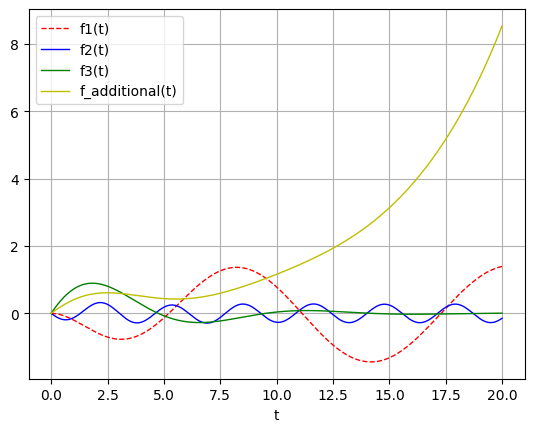

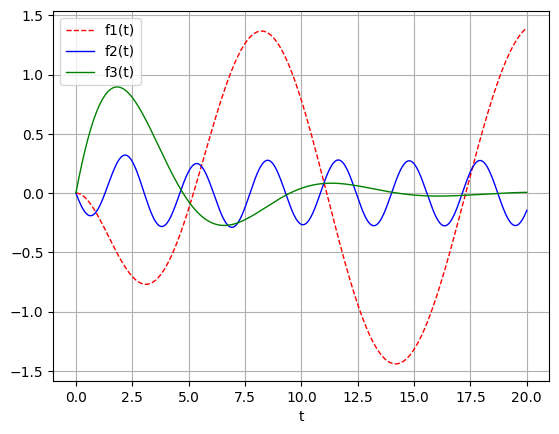

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def rk4_step(f, t, s, h):
    ss = 4
    k = [f(t, s)]
    for i in range(1, ss):
        diff = s
        for j in range(i):
            diff += h * a[i, j] * k[j]
        k.append(f(t + c[i] * h, diff))
    diff = s
    for i in range(ss):
        diff += h * b[i] * k[i]
    return diff


def rk4_nsteps(f, y0, t0, t_end, h):
    n = int((t_end - t0) / h)
    arr = np.empty((n + 1, 2))
    arr[:, 0] = np.linspace(t0, t_end, n + 1, endpoint=True)
    arr[0, 1] = y0

    for i in range(n):
        arr[i + 1, 1] = rk4_step(f,           # right part of SODE
                                 arr[i, 0],   # t_0
                                 arr[i, 1],   # s_0
                                 h)           # time step
    return arr[:, 1]
def rk4_nsteps(f, t0, y0, h, N, T):
    y = np.zeros((3, N+1))
    y[:, :1] = y0
    for i in range(N):
       t = t0 + i * h
       k1 = f(t, y[:, i:i+1])
       k2 = f(t + 0.5 * h, y[:, i:i+1] + 0.5 * h * k1[:, 0])
       k3 = f(t + 0.5 * h, y[:, i:i+1] + 0.5 * h * k2[:,0])
       k4 = f(t + h, y[:, i:i+1] + h * k3[:,0])
       k = (k1 + 2 * k2 + 2 * k3 + k4)/6
       y[:, i+1:i+2] = y[:, i:i+1] + h * k[:, 0]
       return y[:, 1:]

from scipy.integrate import odeint, ode
def F2(s, t):
  dvdt = s[1]
  dudt =( -np.cos(2*t) -s[1] - s[0])/2
  return [dvdt, dudt]
def F1(s,t):
  dvdt = s[1]
  dudt = (-np.cos(-0.5*t) -s[1] -s[0] )/2
  return [dvdt, dudt]
def F3(s,t):
  dvdt = s[1]
  dudt = (2 -s[1] - s[0])/2
  return [dvdt, dudt]
def Fextra(s,t):
  dvdt = s[1]
  dudt = (np.exp(t/5) -s[1] - s[0])/2
  return [dvdt, dudt]
t = np.linspace(0,20, 20000)
s0=[0,0]
s1 = odeint(F1,s0,t)
s2 = odeint(F2,s0,t)
s3 = odeint(F3,s0,t)
s_extra = odeint(Fextra,s0,t)

rk_values1 = rk4_nsteps(F1, y0, t0, t_end, h)
rk_values2 = rk4_nsteps(F2, y0, t0, t_end, h)
rk_values3 = rk4_nsteps(F3, y0, t0, t_end, h)
rk_values4 = rk4_nsteps(Fextra, y0, t0, t_end, h)

plt.plot(t,s1[:,0],'r--', linewidth=1.0,label="f1(t)")
plt.plot(t,s2[:,1],'b-', linewidth=1.0,label="f2(t)")
plt.plot(t,s3[:,1],'g-', linewidth=1.0,label="f3(t)")
plt.plot(t,s_extra[:,1],'y', linewidth=1.0,label="f_additional(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()
plt.plot(t,s1[:,0],'r--', linewidth=1.0,label="f1(t)")
plt.plot(t,s2[:,1],'b-', linewidth=1.0,label="f2(t)")
plt.plot(t,s3[:,1],'g-', linewidth=1.0,label="f3(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

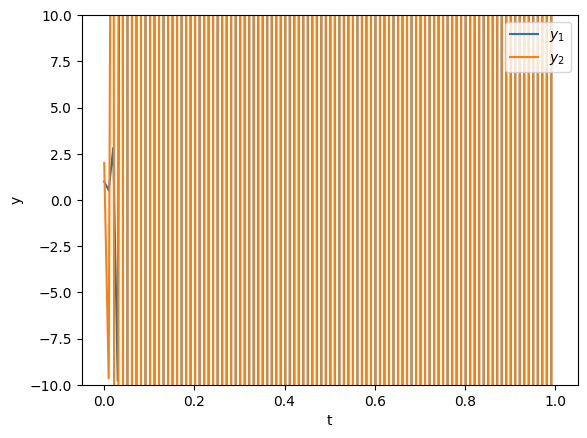

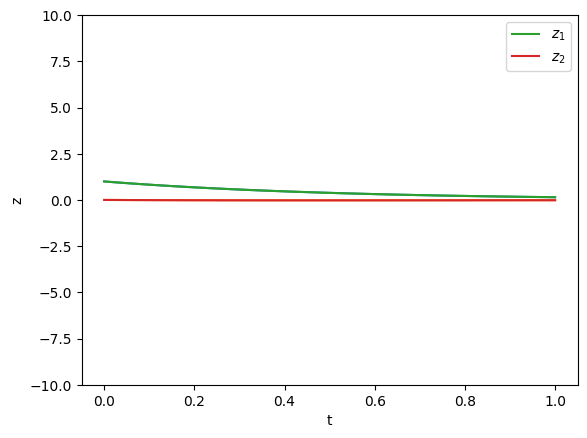

собственные значения A : [  -5.01014 -636.09986]
жесткость A : 126.96253782159295
собственные знач B : [-1.90006 -2.29994]
жесткость B : 1.2104535921354116
оценим шаг h: 0.003144160406460898


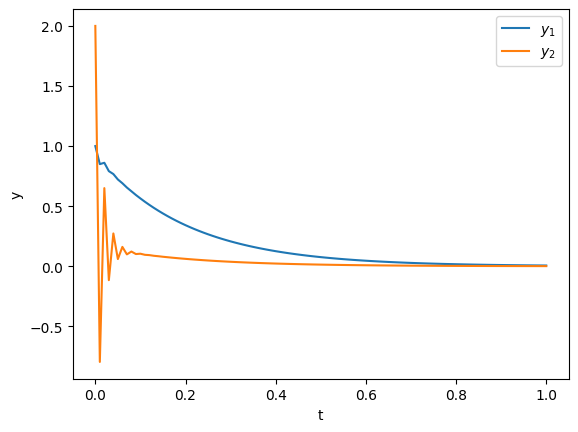

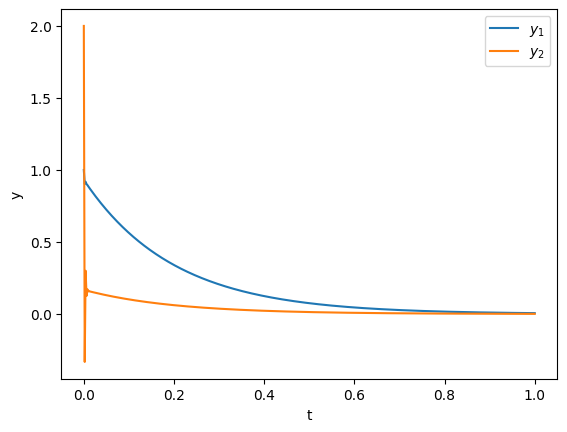

h подобранное : 0.002


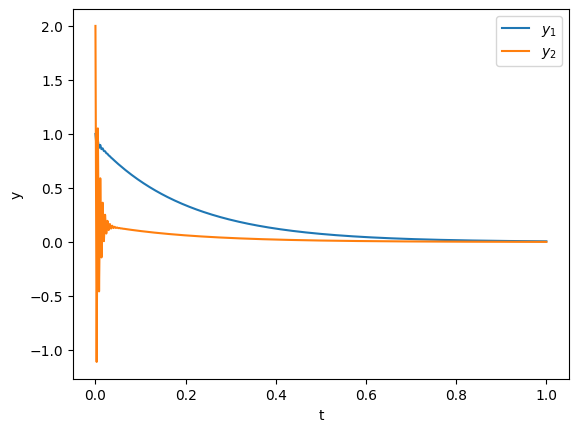

h подобранное : 0.0026666666666666666


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

A = np.array([[-0.717, -23.827],
      [114.483, -640.393]] )
Y0 = np.array([1., 2.])
B = np.array([[-1.905, -0.015], [-0.13, -2.295]])
Z0 = np.array([1., 0.])
def f1(y):
    return A @ y

def f2(y):
    return B @ y



def  el_f2(f, y0, t0, T, h=0.1):
    t = np.arange(t0, T + h /2, h)
    y = np.empty((len(t),  y0.shape[0] if isinstance(y0, np.ndarray) else 1), dtype=np.double)
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        y[i + 1, :] = fsolve(lambda yn: (yn - y[i, :])/h - f(y[i, :])/2 -f(yn)/2, y[i, :])
    return t, y

def ey_funct(f, y0, t0, T, h=0.1):
    t = np.arange(t0, T + h /2, h)
    y = np.empty((len(t),  y0.shape[0] if isinstance(y0, np.ndarray) else 1), dtype=np.double)
    y[0, :] = y0
    for i, t_i in enumerate(t[:-1]):
        y[i + 1, :] = y[i, :] + h * f(y[i, :])
    return t, y

t0 = 0
T = 1
h = 0.01
t_euler_A, y_euler_A = ey_funct(f1, Y0, t0, T, h)
t_euler_B, y_euler_B = ey_funct(f2, Z0, t0, T, h)
plt.plot(t_euler_A, y_euler_A[:, 0], label = "$y_1$")
plt.plot(t_euler_A, y_euler_A[:, 1], label = "$y_2$")
plt.ylim(-10, 10)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()
plt.plot(t_euler_B, y_euler_B)
plt.plot(t_euler_B, y_euler_B[:, 0], label = "$z_1$")
plt.plot(t_euler_B, y_euler_B[:, 1], label = "$z_2$")
plt.ylim(-10, 10)
plt.legend()
plt.xlabel("t")
plt.ylabel("z")
plt.show()
l_A = np.linalg.eigvals(A)
l_B = np.linalg.eigvals(B)
with np.printoptions(5):
    print("собственные значения A :", l_A)
    a_stiff = np.max(np.abs(l_A))/np.min(np.abs(l_A))
    print(f"жесткость A : {a_stiff}")
    print("собственные знач B :", l_B)
    b_stiff = np.max(np.abs(l_B))/np.min(np.abs(l_B))
    print(f"жесткость B : {b_stiff}")
print(f"оценим шаг h: {2/np.max(np.abs(l_A))}")

t_ieuler_A, y_ieuler_A = el_f2(f1, Y0, t0, T, h)
plt.plot(t_ieuler_A, y_ieuler_A[:, 0], label = "$y_1$")
plt.plot(t_ieuler_A, y_ieuler_A[:, 1], label = "$y_2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()


t_euler_A, y_euler_A = ey_funct(f1, Y0, t0, T, h/5)
plt.plot(t_euler_A, y_euler_A[:, 0], label = "$y_1$")
plt.plot(t_euler_A, y_euler_A[:, 1], label = "$y_2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()
print(f"h подобранное : {h/5}")
t_euler_A, y_euler_A = ey_funct(f1, Y0, t0, T, h/3.75)
plt.plot(t_euler_A, y_euler_A[:, 0], label = "$y_1$")
plt.plot(t_euler_A, y_euler_A[:, 1], label = "$y_2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()
print(f"h подобранное : {h/3.75}")
